In [21]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd






# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')  # Asegúrate de que el archivo esté en la misma carpeta que tu notebook

In [28]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

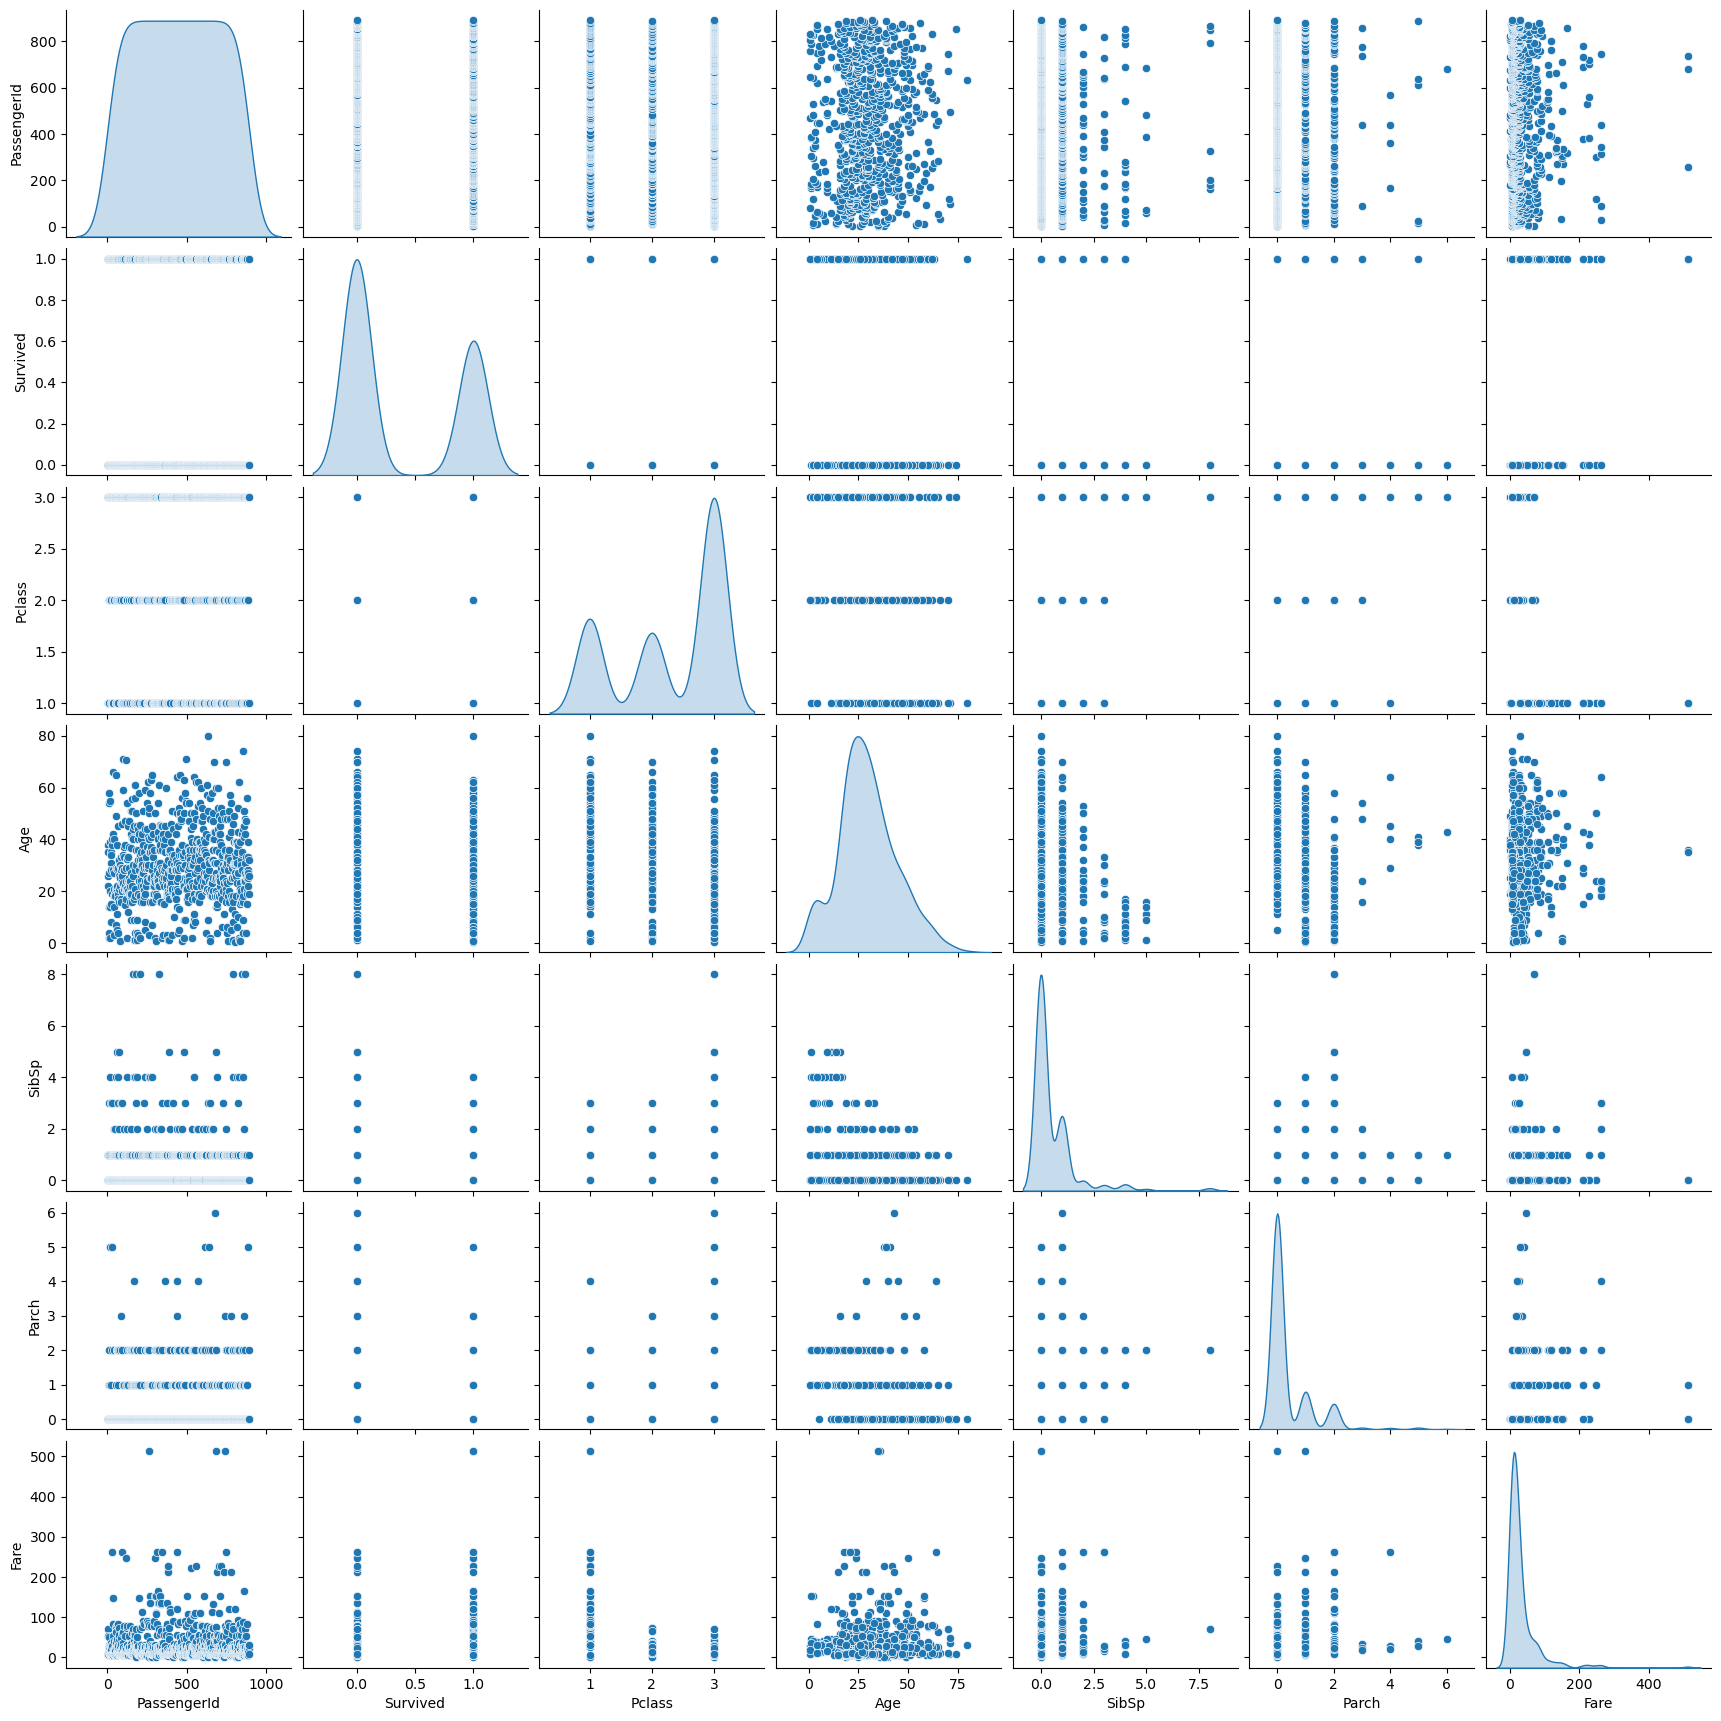

In [32]:
sns.pairplot(df, diag_kind='kde')  # Relación entre variables


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Carga y análisis exploratorio del dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Inspección general
def exploratory_analysis(data):
    print("\nPrimeras filas del dataset:\n", data.head())
    print("\nInformación del dataset:\n")
    data.info()
    print("\nEstadísticas descriptivas:\n", data.describe(include='all'))
    print("\nValores nulos por columna:\n", data.isnull().sum())


Primeras filas del dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

/var/folders/p1/gxfc_nkd0rv0954787hc_hg00000gn/T/ipykernel_1735/1016832798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


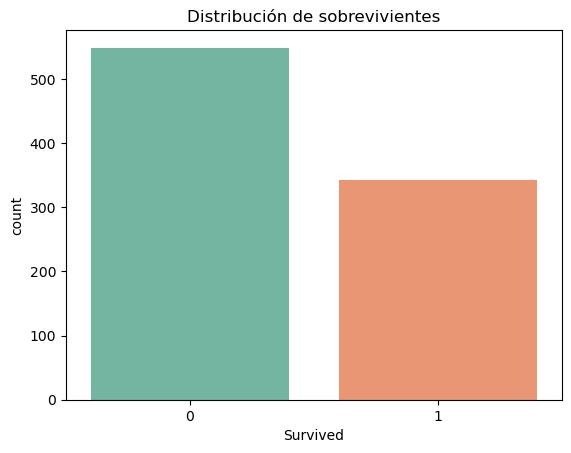

In [44]:
exploratory_analysis(df)

# Visualización inicial de datos
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title('Distribución de sobrevivientes')
plt.show()

In [48]:
 
# Eliminación de columnas no necesarias o irrelevantes
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Relleno de valores nulos
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Codificación de variables categóricas
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])


In [50]:
# 3. Selección de características
# Separación de variables independientes y dependientes
X = df.drop('Survived', axis=1)
y = df['Survived']

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Matriz de confusión:
 [[90 15]
 [20 54]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Precisión del modelo: 0.8044692737430168


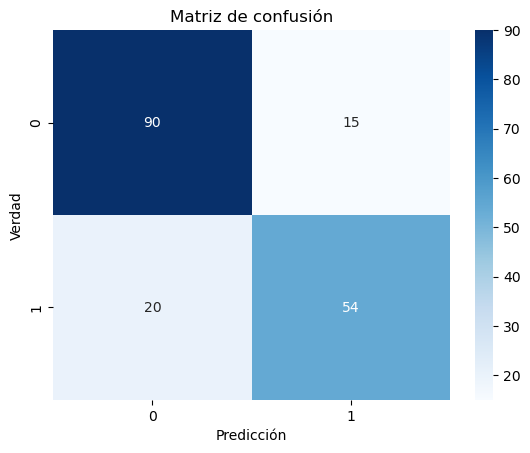

In [54]:
# 4. División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del modelo
# Usaremos Regresión Logística como modelo inicial
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Evaluación del modelo
y_pred = model.predict(X_test)

# Métricas y visualización
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))

# Visualización de la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()


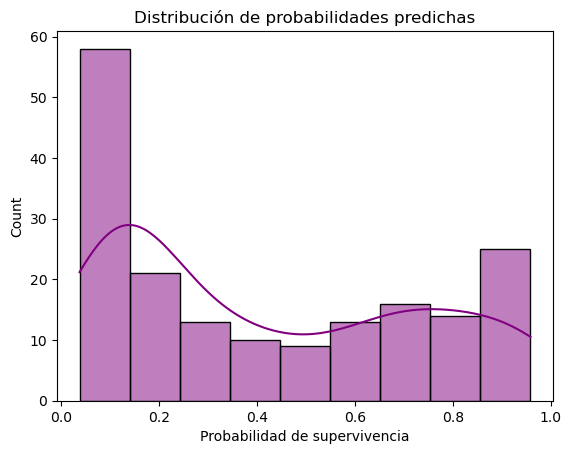

In [56]:
# 7. Gráficas adicionales
# Curvas de evaluación
probs = model.predict_proba(X_test)[:, 1]
sns.histplot(probs, kde=True, color='purple')
plt.title('Distribución de probabilidades predichas')
plt.xlabel('Probabilidad de supervivencia')
plt.show()

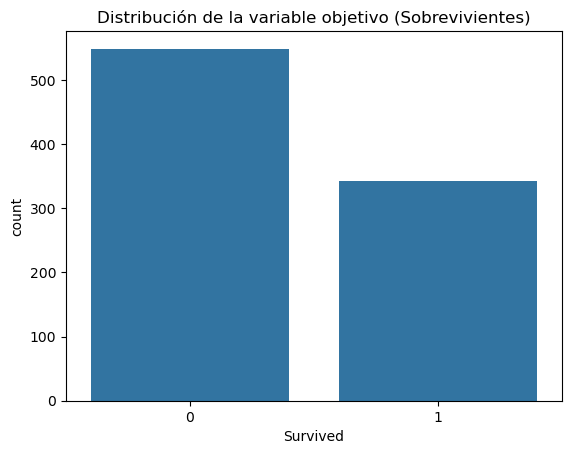

In [58]:
sns.countplot(x='Survived', data=df)
plt.title('Distribución de la variable objetivo (Sobrevivientes)')
plt.show()

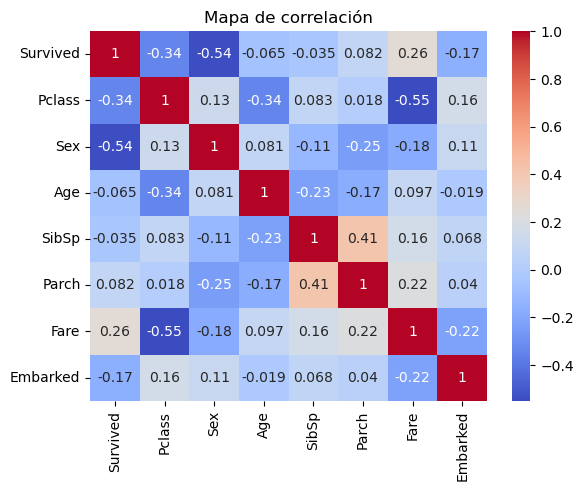

In [68]:
# Correlación entre las variables numéricas
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()


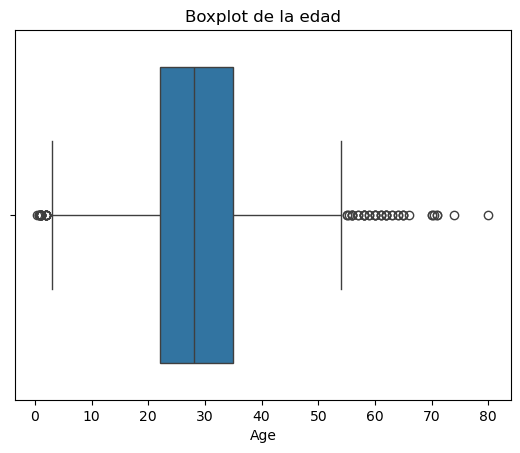

In [62]:
sns.boxplot(x='Age', data=df)
plt.title('Boxplot de la edad')
plt.show()

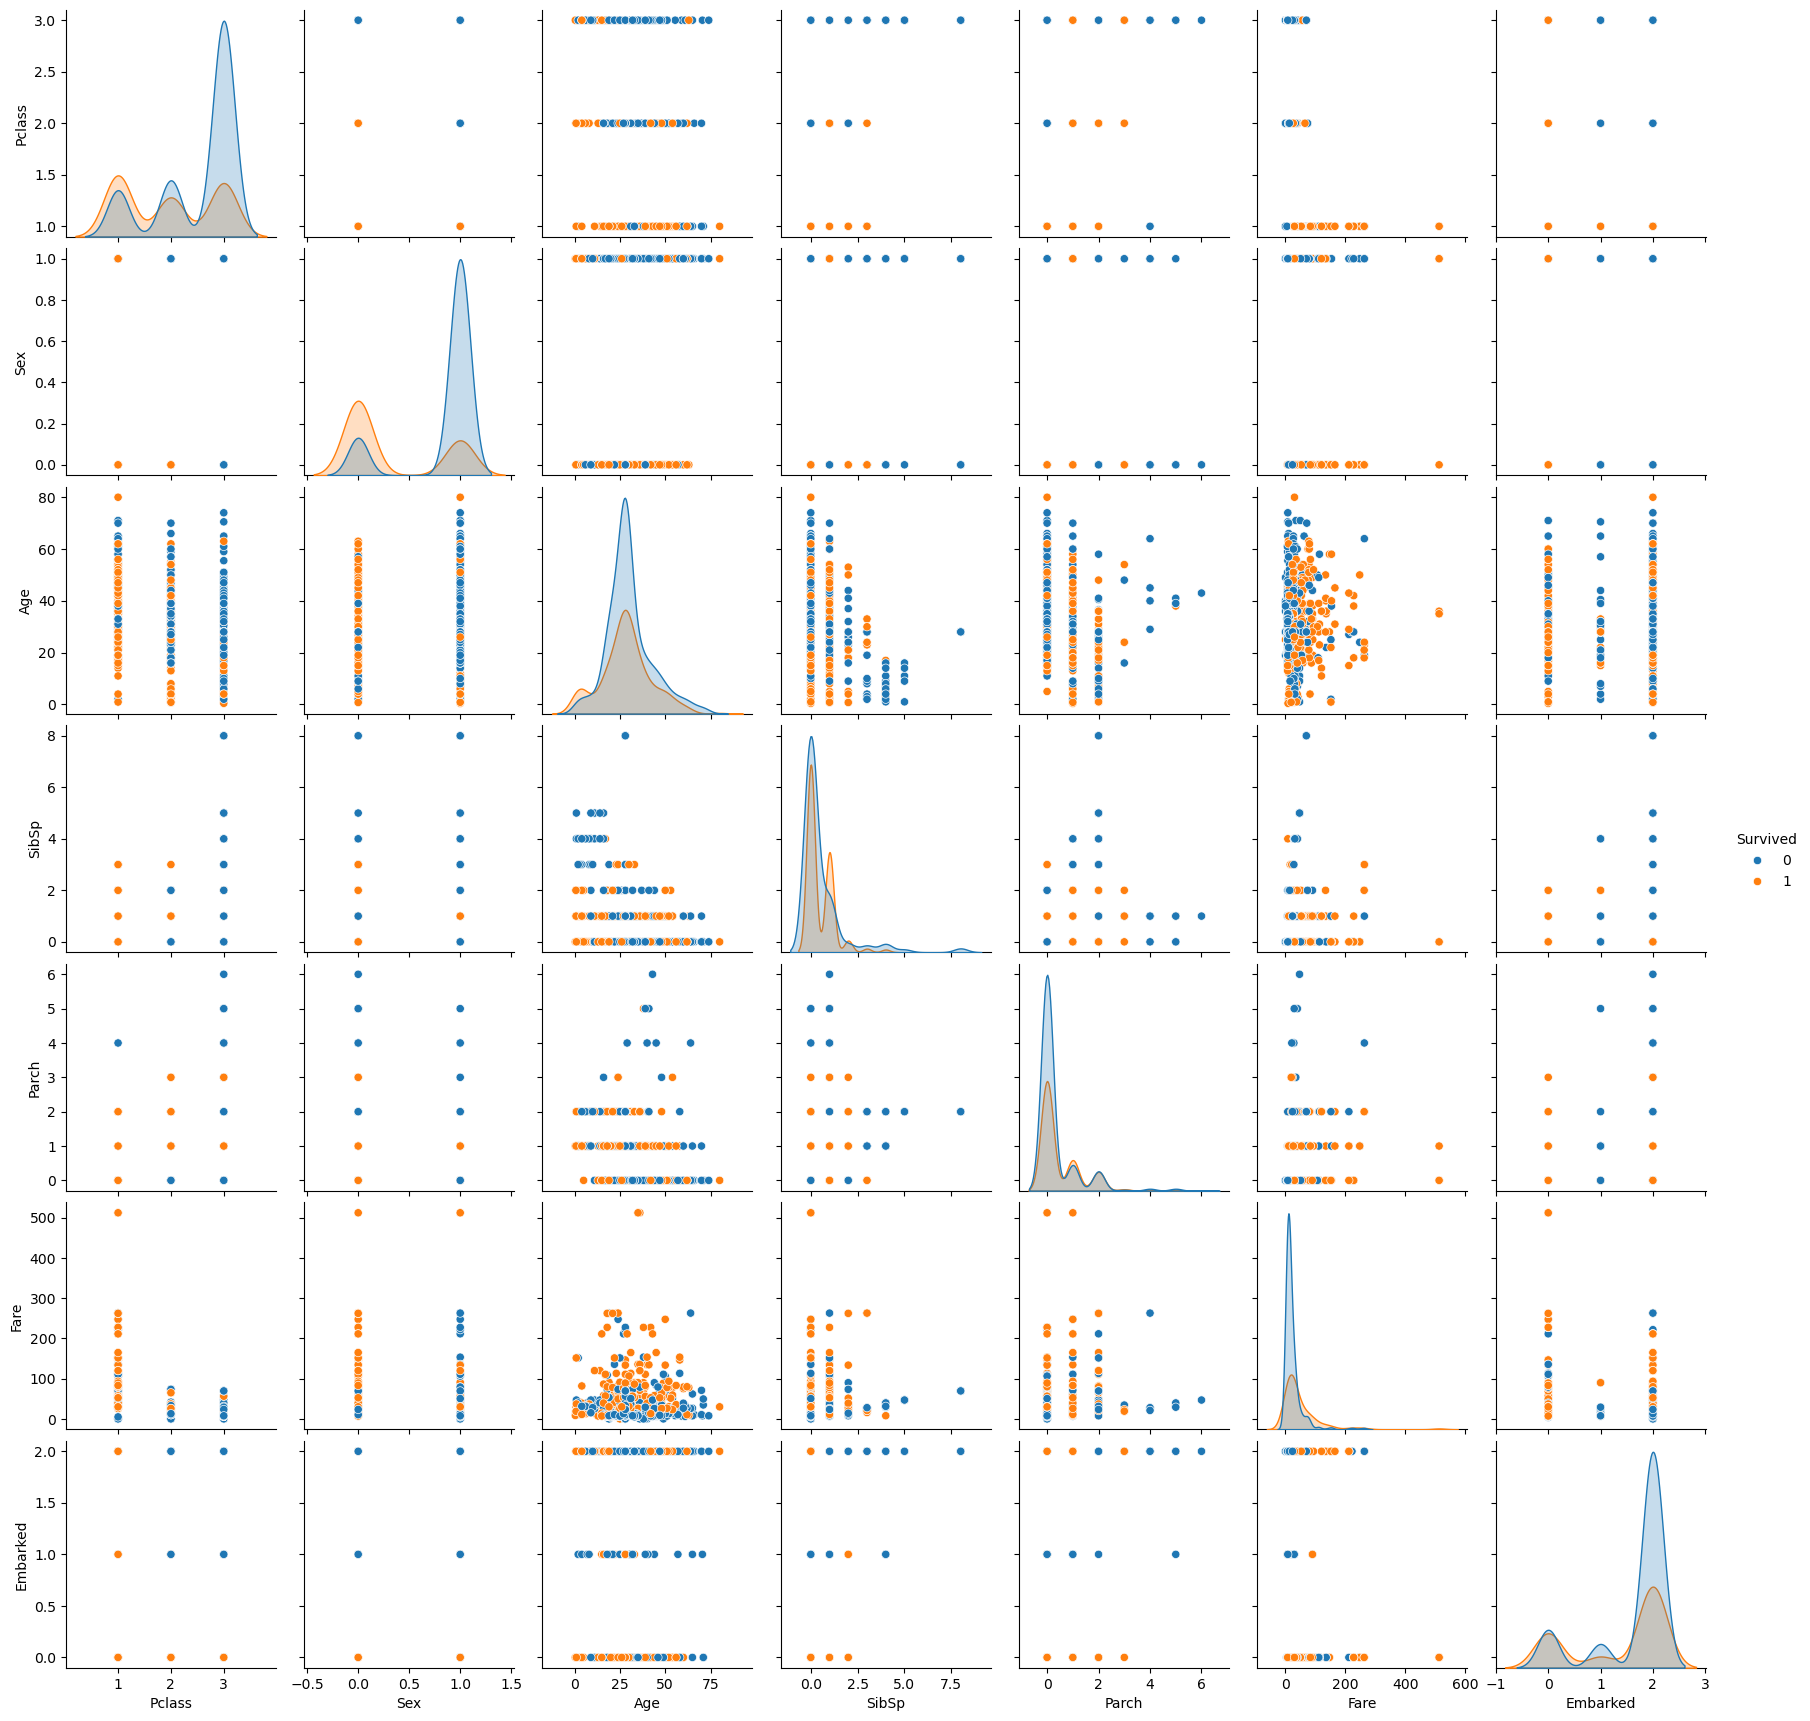

In [64]:
# Estadísticas descriptivas
df.describe()

# Verificación de valores nulos
df.isnull().sum()

# Visualización de distribuciones de las características numéricas
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Survived')
plt.show()